In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
import PIL
import tensorflow as tf
from tensorflow.keras.layers import InputLayer
from keras.layers.core import Dense
from keras.layers.core import Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pathlib

In [ ]:
data_dir = "/content/drive/MyDrive/Dataset/train/Scenes training set"

data_dir = pathlib.Path(data_dir)


In [ ]:
img_height,img_width=180,180
batch_size=32


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 14034 files belonging to 6 classes.
Using 2806 files for validation.
['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']


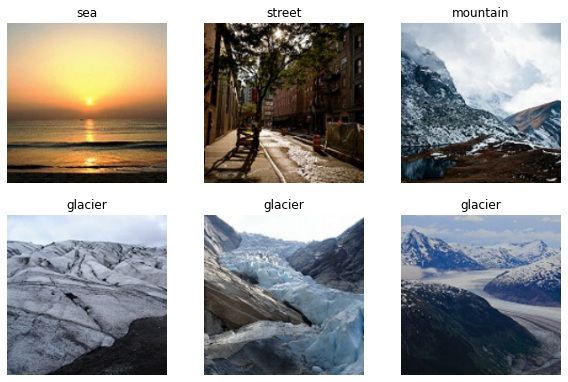

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='max',classes=6,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)

In [ ]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(6, activation='softmax'))
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 6)                 3078      
                                                                 
Total params: 24,639,878
Trainable params: 1,052,166
Non-trainable params: 23,587,712
_________________________________________________________________


In [ ]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = resnet_model.fit(train_ds, validation_data=val_ds, epochs=10)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


351/351 [==============================] - 1735s 5s/step - loss: 0.8404 - accuracy: 0.8402 - val_loss: 0.3204 - val_accuracy: 0.8963
Epoch 2/10
351/351 [==============================] - 1050s 3s/step - loss: 0.2730 - accuracy: 0.9040 - val_loss: 0.2992 - val_accuracy: 0.8959
Epoch 3/10
351/351 [==============================] - 1051s 3s/step - loss: 0.2059 - accuracy: 0.9236 - val_loss: 0.3323 - val_accuracy: 0.8913
Epoch 4/10
351/351 [==============================] - 1051s 3s/step - loss: 0.1798 - accuracy: 0.9325 - val_loss: 0.3489 - val_accuracy: 0.8913
Epoch 5/10
351/351 [==============================] - 1050s 3s/step - loss: 0.1445 - accuracy: 0.9479 - val_loss: 0.3696 - val_accuracy: 0.8852
Epoch 6/10
351/351 [==============================] - 1050s 3s/step - loss: 0.1261 - accuracy: 0.9548 - val_loss: 0.4151 - val_accuracy: 0.8763
Epoch 7/10
351/351 [==============================] - 1051s 3s/step - loss: 0.1200 - accuracy: 0.9549 - val_loss: 0.4000 - val_accuracy: 0.8838
Epo

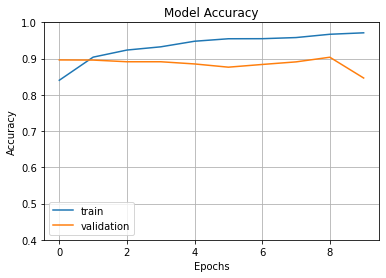

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

<class 'numpy.ndarray'>


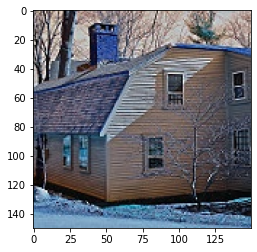

In [ ]:
# Example
import cv2
image = cv2.imread("/content/drive/MyDrive/Dataset/val/Scenes testing test/144.jpg")
print(type(image))
plt.imshow(image, cmap='gray')
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

In [ ]:
#Cont Example
pred=resnet_model.predict(image)
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

1/1 [==============================] - 0s 120ms/step
The predicted class is buildings


In [ ]:
from sklearn import model_selection, datasets
from sklearn.tree import DecisionTreeClassifier
import joblib
filename = "Completed_model.joblib"
joblib.dump(resnet_model, filename)


['Completed_model.joblib']

In [ ]:
folder_dir = "/content/drive/MyDrive/Dataset/val/Scenes testing test"
for images in os.listdir(folder_dir):
     # check if the image ends with png
     f = open("/content/drive/MyDrive/Dataset/ImagesNames.txt", "a")
     f.write(images)
     f.write("\n")
     f.close()
        

      
for images in os.listdir(folder_dir):
    # check if the image ends with png
        g = open("/content/drive/MyDrive/Dataset/ImagesPredictions.txt", "a")
        imgDir = "/content/drive/MyDrive/Dataset/val/Scenes testing test/" + images
        img = cv2.imread(imgDir)
        img_resized = cv2.resize(img, (img_height,img_width))
        img = np.expand_dims(img_resized,axis=0)
        pred = resnet_model.predict(img)
        predicted_class = class_names[np.argmax(pred)]
        if predicted_class   == "buildings":
          class_number = 0
        elif predicted_class == "forest":
          class_number = 1 
        elif predicted_class == "glacier":
          class_number = 2 
        elif predicted_class == "mountain":
          class_number = 3 
        elif predicted_class == "sea":
          class_number = 4 
        elif predicted_class == "street":
          class_number = 5
        else:
          class_number = None
            
        g.write(str(class_number))
        g.write("\n")
        g.close()
        

1/1 [==============================] - 0s 112ms/step
